In [4]:
import importlib
from matplotlib import pyplot as plt 


import calibration_metric
from calibration_metric.vis.calibration_plot import plot_df, get_df_from_file
from calibration_metric.utils.reader import MisoTopLogitFormatSequenceReader, TopKTopLogitFormatSequenceReader
importlib.reload(calibration_metric)

calflow_paths_and_models = [("/brtx/603-nvme1/estengel/calflow_calibration/benchclamp/text_to_calflow/1.0/t5-small-lm-adapt_calflow_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "T5-small"),
                            ("/brtx/603-nvme1/estengel/calflow_calibration/benchclamp/text_to_calflow/1.0/t5-base-lm-adapt_calflow_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "T5-base"),
                            ("/brtx/603-nvme1/estengel/calflow_calibration/benchclamp/text_to_calflow/1.0/t5-large-lm-adapt_calflow_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits", 
                             "T5-large"),
                            ("/brtx/604-nvme1/estengel/calflow_calibration/benchclamp/text_to_calflow/1.0/bart-base_calflow_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "BART-base"),
                            ("/brtx/603-nvme1/estengel/calflow_calibration/benchclamp/text_to_calflow/1.0/bart-large_calflow_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "BART-large")]

tree_dst_paths_and_models = [("/brtx/605-nvme1/estengel/calflow_calibration/benchclamp/text_to_treedst/1.0/t5-small-lm-adapt_tree_dst_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "T5-small"),
                            ("/brtx/603-nvme1/estengel/calflow_calibration/benchclamp/text_to_treedst/1.0/t5-base-lm-adapt_tree_dst_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "T5-base"),
                            ("/brtx/603-nvme1/estengel/calflow_calibration/benchclamp/text_to_treedst/1.0/t5-large-lm-adapt_tree_dst_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "T5-large"),
                            ("/brtx/604-nvme1/estengel/calflow_calibration/benchclamp/text_to_treedst/1.0/bart-base_tree_dst_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "BART-base"),
                            ("/brtx/605-nvme1/estengel/calflow_calibration/benchclamp/text_to_treedst/1.0/bart-large_tree_dst_last_user_all_0.0001/checkpoint-10000/outputs/test_all.logits",
                            "BART-large")]

all_dfs = {k: {"calflow": {}, "tree_dst": {}} for k in range(1,6)}

for k in range(1,6):
    print("get calflow dfs")
    for path, name in calflow_paths_and_models:
        df, ece = get_df_from_file(path, binning_strategy="adaptive", reader_cls = TopKTopLogitFormatSequenceReader, reader_kwargs = {"k": k})
        all_dfs[k]['calflow'][name] = (df, ece)
    print("get tree_dst dfs")
    for path, name in tree_dst_paths_and_models:
        df, ece = get_df_from_file(path, binning_strategy="adaptive", reader_cls = TopKTopLogitFormatSequenceReader, reader_kwargs = {"k": k})
        all_dfs[k]['tree_dst'][name] = (df, ece)


    # df_to_plot = get_df_from_file(path_to_file, n_bins=20)
    # fig = plot_df(df_to_plot)

get calflow dfs
get tree_dst dfs
get calflow dfs
get tree_dst dfs
get calflow dfs
get tree_dst dfs
get calflow dfs
get tree_dst dfs
get calflow dfs
get tree_dst dfs


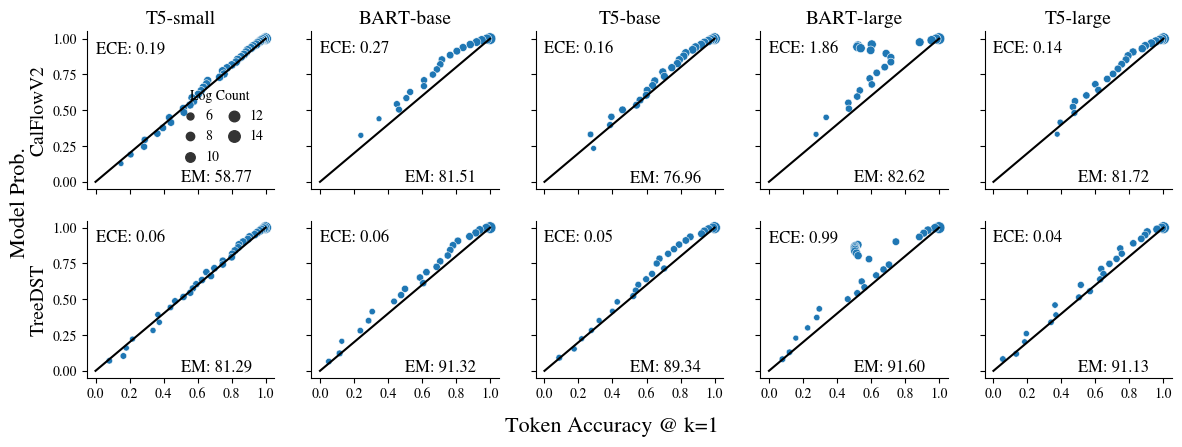

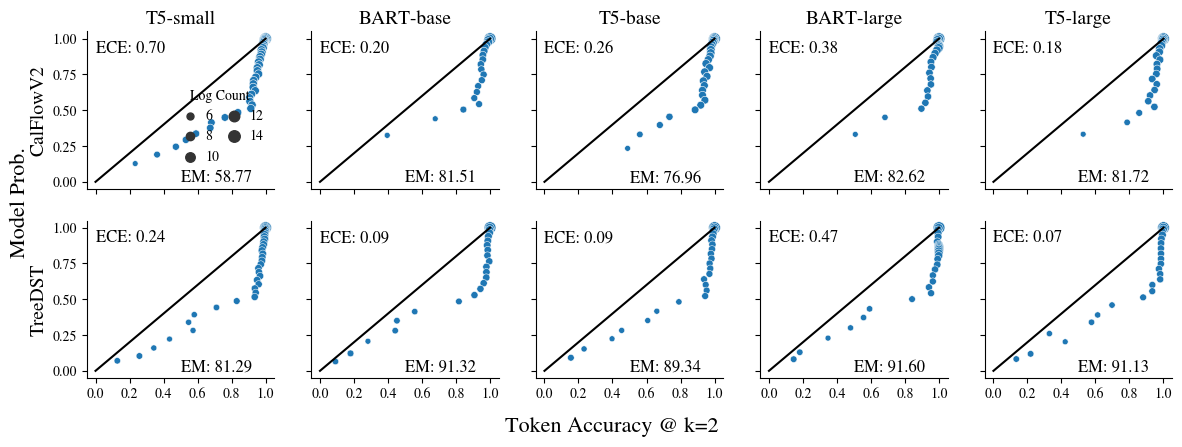

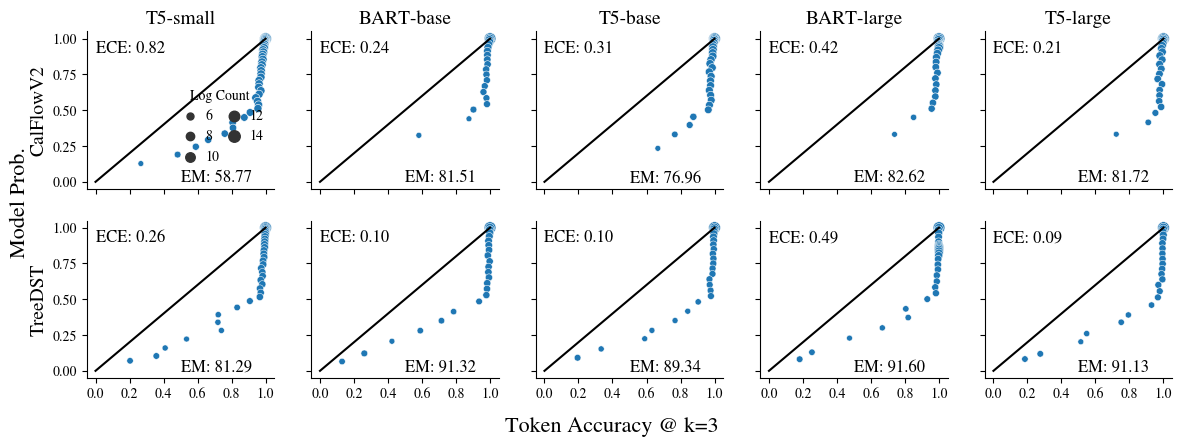

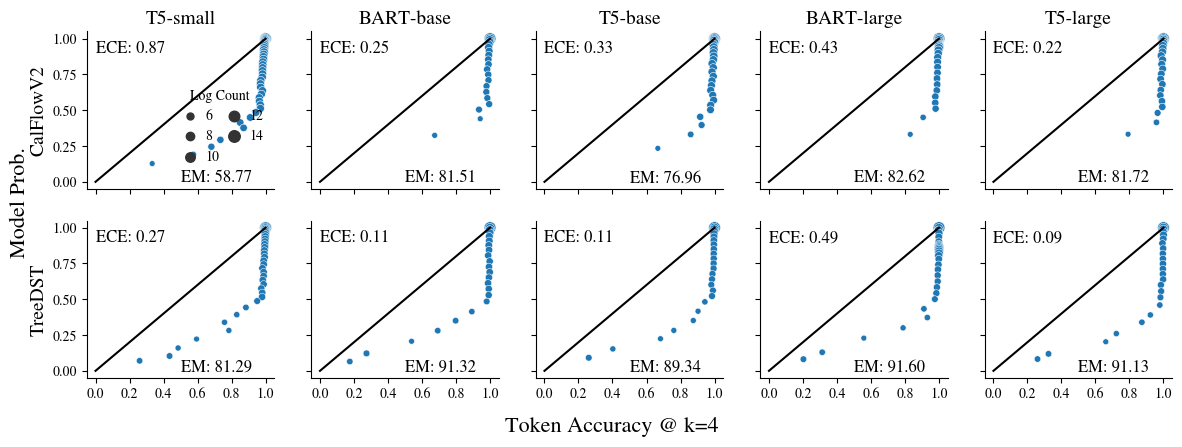

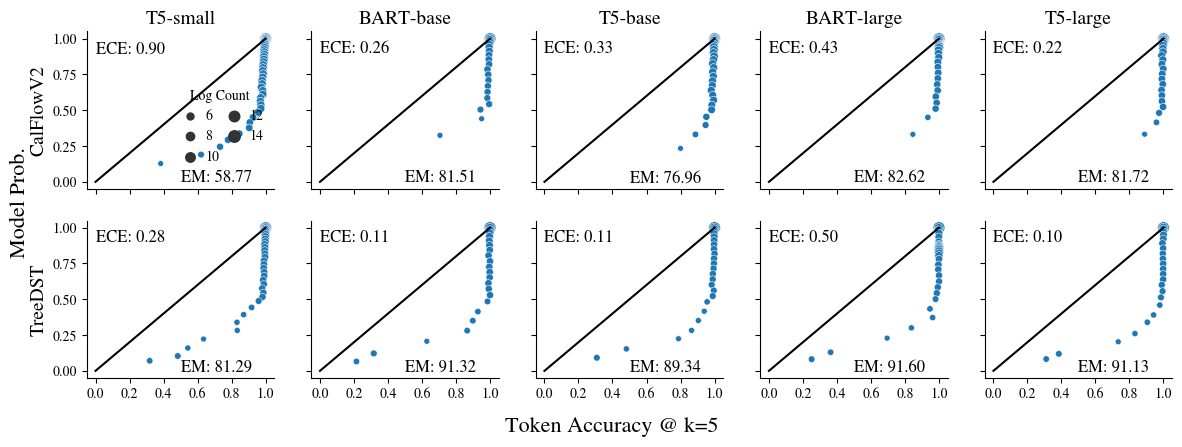

In [6]:
from matplotlib import pyplot as plt 

plt.rcParams["font.family"] = "Nimbus Roman"
import pandas as pd 

importlib.reload(calibration_metric)
from calibration_metric.vis.calibration_plot import plot_df

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)



order = ["T5-small", "BART-base", "T5-base", "BART-large", "T5-large" ]
with open("calibration_results/metrics.csv") as f:
    metric_df = pd.read_csv(f)

metric_kwargs = {"x": 0.000, "y": 0.9, "fontsize": 12, "horizontalalignment": "left"}
em_kwargs = {"x": 0.50, "y": 0.0, "fontsize": 12, "horizontalalignment": "left"}

# TODO (elias): add EM to plots 

for k in range(1, 6):
    fig, axes = plt.subplots(2, 5, figsize=(14, 4.5), sharex=True, sharey=True)
    for i, model in enumerate(order):
        try:
            cf_df_to_plot, ece = all_dfs[k]['calflow'][model]
            plot_df(cf_df_to_plot, 
                    ax=axes[0, i], 
                    title=model, 
                    show_legend=False, 
                    metric_value=ece, 
                    metric_value_kwargs=metric_kwargs,
                    xlabel=None,
                    ylabel="CalFlowV2")
            em_value = metric_df[metric_df['Model'].str.startswith(model)][metric_df['Dataset'] == "CalflowV2"]['EM'].values[0]
            axes[0,i].text(s=f"EM: {em_value:.2f}", **em_kwargs)
            axes[0,0].set_ylabel("CalFlowV2", fontsize=14)
            axes[0,i].set_title(model, fontsize=14)
            axes[0,i].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
        except:
            pass
        try:
            td_df_to_plot, ece = all_dfs[k]['tree_dst'][model]
            plot_df(td_df_to_plot, 
                    ax=axes[1, i], 
                    title=None, 
                    show_legend=False, 
                    metric_value=ece, 
                    metric_value_kwargs=metric_kwargs,
                    xlabel=None,
                    ylabel="TreeDST") 
            em_value = metric_df[metric_df['Model'].str.startswith(model)][metric_df['Dataset'] == "TreeDST"]['EM'].values[0]
            axes[1,0].set_ylabel("TreeDST", fontsize=14)
            axes[1,i].text(s=f"EM: {em_value:.2f}", **em_kwargs)
            axes[1,i].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])

        except KeyError:
            pass

    handles, labels = plt.gca().get_legend_handles_labels()
    fig.legend(handles, labels, ncol=2, title="Log Count", frameon=False, bbox_to_anchor=(0.26, 0.78), handletextpad=0.1, columnspacing=0.1)

    fig.text(0.07, 0.5, "Model Prob.", va='center', rotation='vertical', fontsize=16)
    fig.text(0.5, -0.01, f"Token Accuracy @ k={k}", ha='center', fontsize=16)
    # fig.tight_layout()

    # plt.savefig("/home/estengel/papers/did-you-mean-2022/figures/all_models_calibration_plot_adaptive.pdf", bbox_inches='tight')